# Market Analysis

In [1]:
# System init

import pandas as pd
import pandas_datareader.data as pdr
import datetime
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import os
from functools import reduce
from dataclasses import dataclass

pio.templates.default = 'plotly_dark'

/Users/leo/opt/anaconda3/envs/jupyter-notebooks/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Data gathering

end = datetime.datetime.today()
start = end - datetime.timedelta(days=365)
symbols = ['^GSPC', 'AAPL', 'TSLA', 'GOOG', 'CERN', 'FB', 'NFLX', 'AMZN']

dfs = {s: pdr.DataReader(s, 'yahoo', start, end) for s in symbols}

## Stocks Numerical Analysis

TODO: add balance sheet

In [3]:
def analyze(symbol, df):
    high = df['High'].max()
    high_date = df['High'].idxmax()
    low_date = df.loc[high_date:]['Low'].idxmin()
    low = df.loc[low_date]['Low']
    diff = low - high
    diff_pct = diff / high
    last_close = df.tail(1)['Close'][0]
    close_std = df['Close'].std()
    close_mean = df['Close'].mean()
    one_sig_below = close_mean - close_std
    return pd.DataFrame(
        index=[symbol],
        columns=['last_close', 'high', 'high_date', 'low_after_high', 'low_ah_date', 'diff', 'diff_pct', 'close_std', 'close_mean', 'one_sig_below'],
        data=[[last_close, high, high_date, low, low_date, diff, diff_pct, close_std, close_mean, one_sig_below]]
    )

analysed_arr = [analyze(s, dfs[s]) for s in symbols]
analysis = reduce(lambda left, right: left.append(right), analysed_arr)
analysis 

,last_close,high,high_date,low_after_high,low_ah_date,diff,diff_pct,close_std,close_mean,one_sig_below
^GSPC,2304.919922,3393.520020,2020-02-19,2280.520020,2020-03-18,-1113.000000,-0.327978,181.304727,3004.690788,2823.386061
AAPL,229.240005,327.850006,2020-01-29,228.000000,2020-03-20,-99.850006,-0.304560,44.059218,237.369641,193.310423
TSLA,427.529999,968.989990,2020-02-04,350.510010,2020-03-18,-618.479980,-0.638273,176.040969,346.332112,170.291143
GOOG,1072.319946,1532.105957,2020-02-19,1037.280029,2020-03-18,-494.825928,-0.322971,116.846533,1247.701315,1130.854782
CERN,56.549999,80.900002,2020-02-05,54.540001,2020-03-18,-26.360001,-0.325834,4.616631,69.643984,65.027353
FB,149.729996,224.199997,2020-01-29,137.100006,2020-03-18,-87.099991,-0.388492,14.527317,190.932828,176.405511
NFLX,332.829987,393.519989,2020-03-03,290.250000,2020-03-17,-103.269989,-0.262426,35.440546,330.388126,294.947580
AMZN,1846.089966,2185.949951,2020-02-11,1626.030029,2020-03-16,-559.919922,-0.256145,97.747002,1851.585137,1753.838136


## Stock Graphs

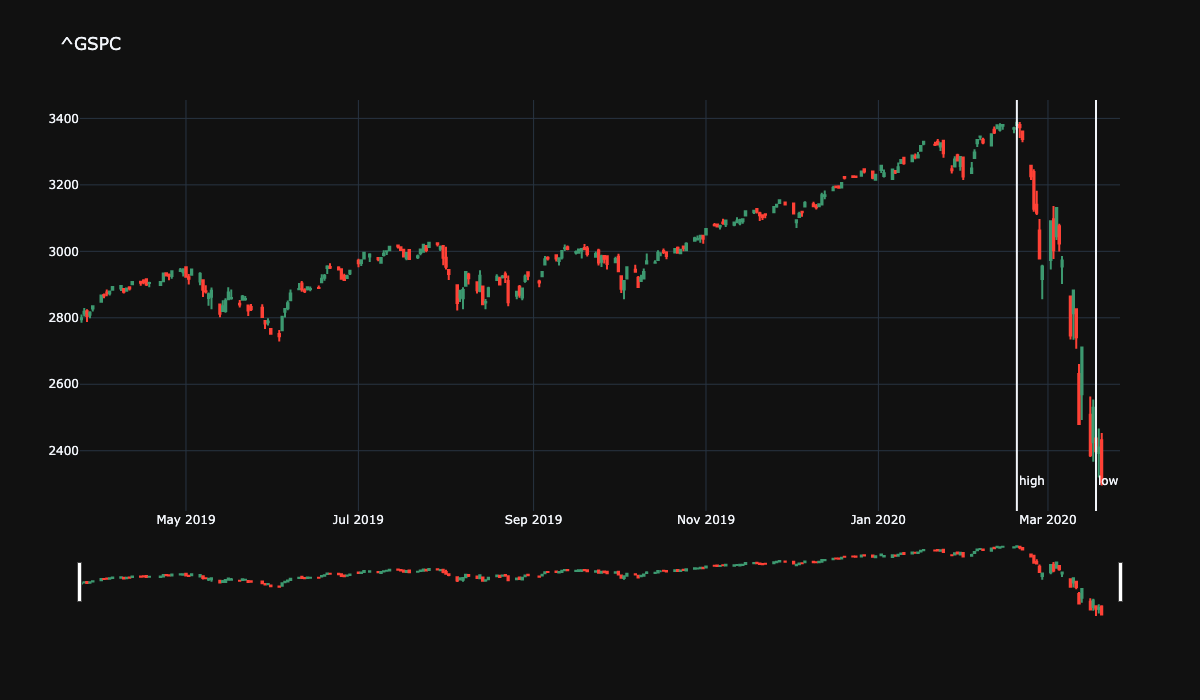

,^GSPC
last_close,2304.92
high,3393.52
high_date,2020-02-19 00:00:00
low_after_high,2280.52
low_ah_date,2020-03-18 00:00:00
diff,-1113
diff_pct,-0.327978
close_std,181.305
close_mean,3004.69
one_sig_below,2823.39


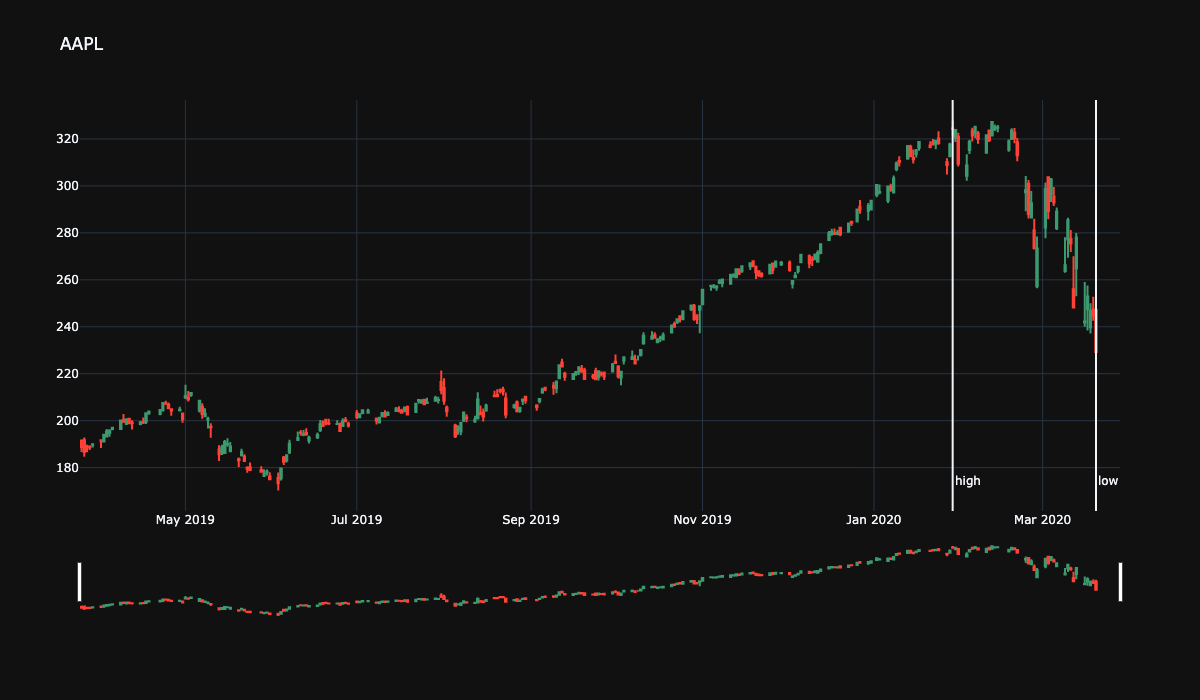

,AAPL
last_close,229.24
high,327.85
high_date,2020-01-29 00:00:00
low_after_high,228
low_ah_date,2020-03-20 00:00:00
diff,-99.85
diff_pct,-0.30456
close_std,44.0592
close_mean,237.37
one_sig_below,193.31


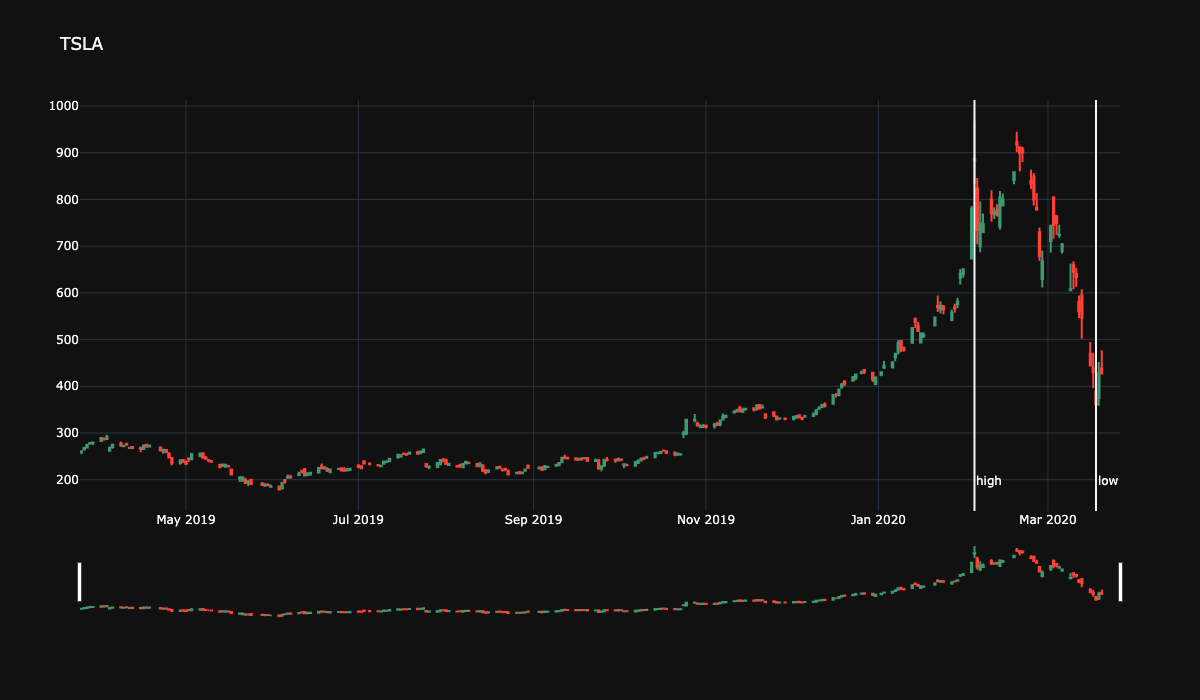

,TSLA
last_close,427.53
high,968.99
high_date,2020-02-04 00:00:00
low_after_high,350.51
low_ah_date,2020-03-18 00:00:00
diff,-618.48
diff_pct,-0.638273
close_std,176.041
close_mean,346.332
one_sig_below,170.291


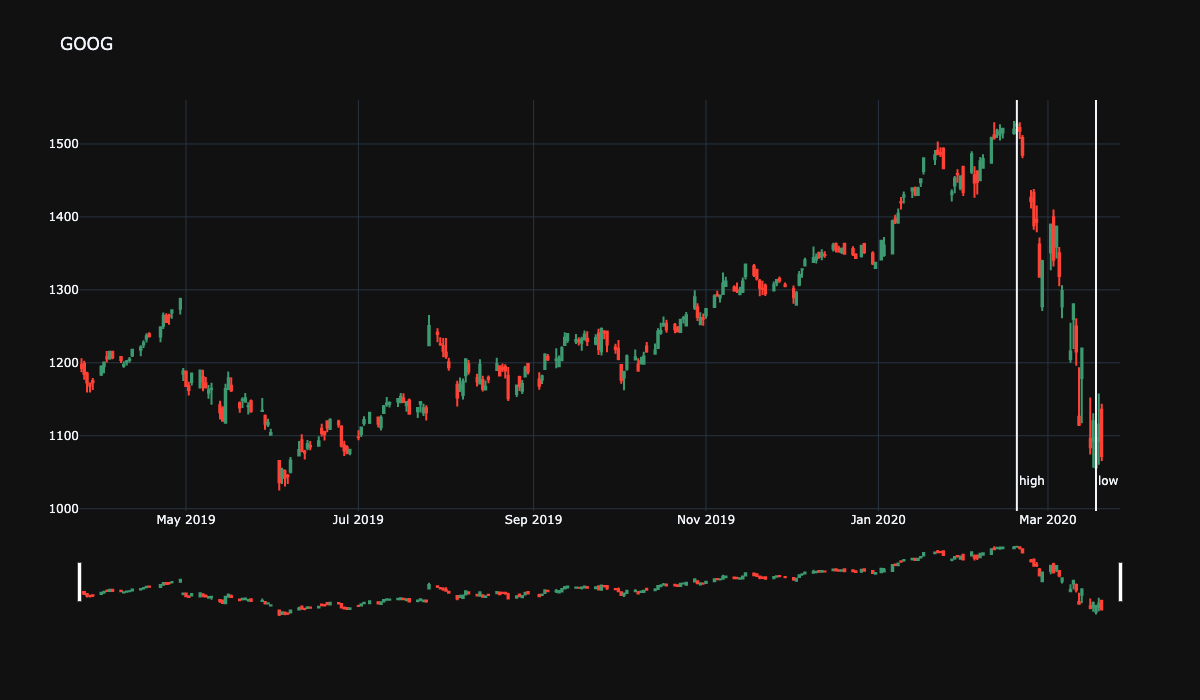

,GOOG
last_close,1072.32
high,1532.11
high_date,2020-02-19 00:00:00
low_after_high,1037.28
low_ah_date,2020-03-18 00:00:00
diff,-494.826
diff_pct,-0.322971
close_std,116.847
close_mean,1247.7
one_sig_below,1130.85


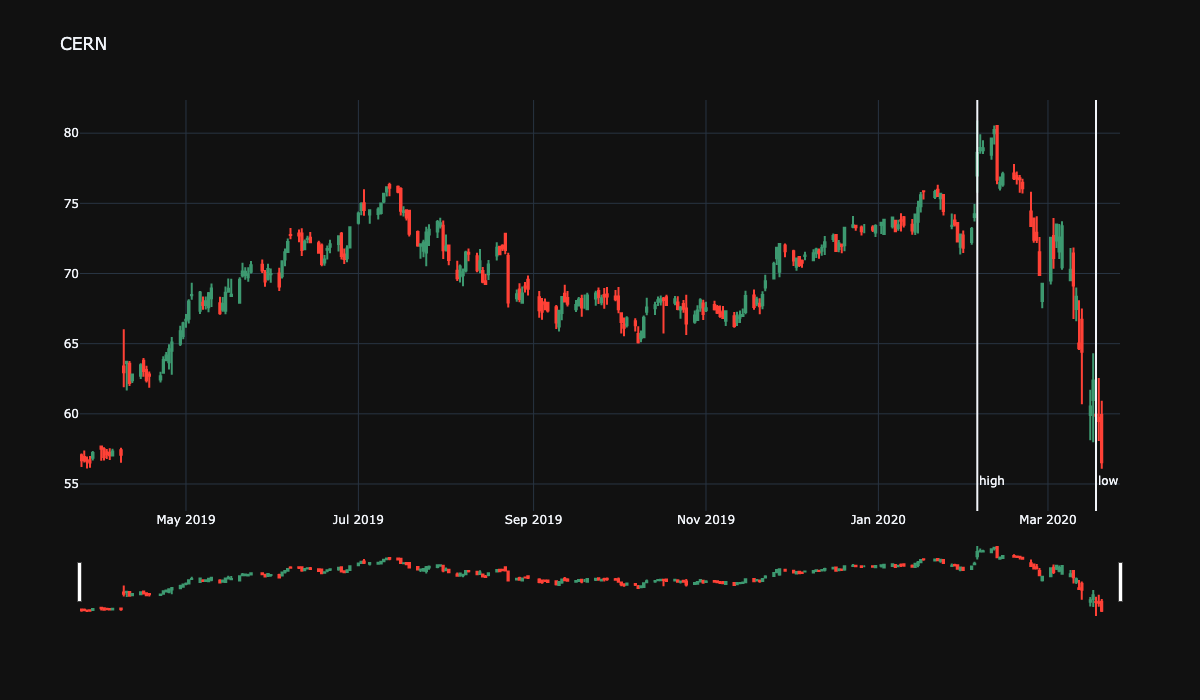

,CERN
last_close,56.55
high,80.9
high_date,2020-02-05 00:00:00
low_after_high,54.54
low_ah_date,2020-03-18 00:00:00
diff,-26.36
diff_pct,-0.325834
close_std,4.61663
close_mean,69.644
one_sig_below,65.0274


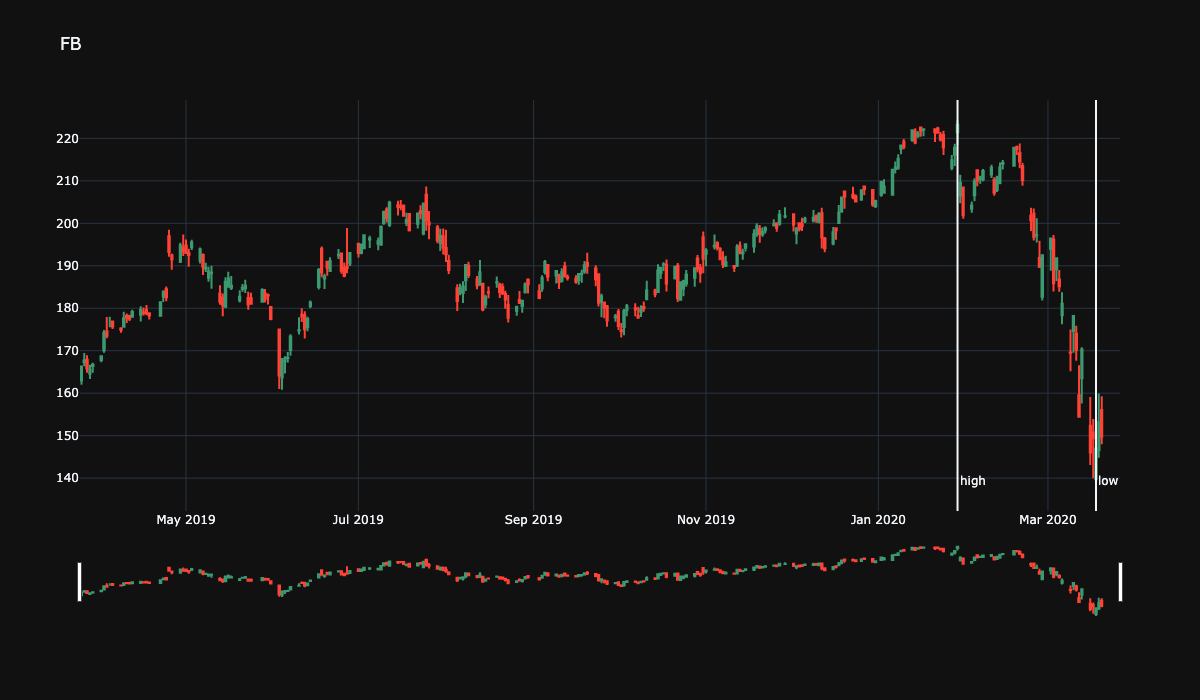

,FB
last_close,149.73
high,224.2
high_date,2020-01-29 00:00:00
low_after_high,137.1
low_ah_date,2020-03-18 00:00:00
diff,-87.1
diff_pct,-0.388492
close_std,14.5273
close_mean,190.933
one_sig_below,176.406


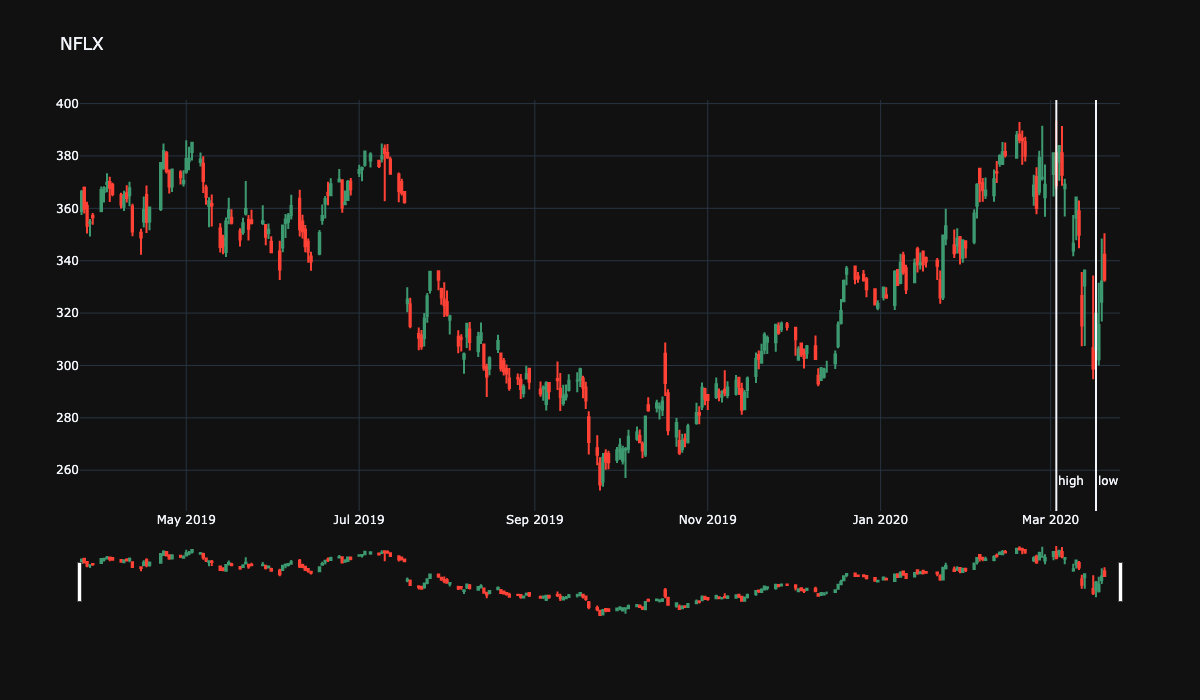

,NFLX
last_close,332.83
high,393.52
high_date,2020-03-03 00:00:00
low_after_high,290.25
low_ah_date,2020-03-17 00:00:00
diff,-103.27
diff_pct,-0.262426
close_std,35.4405
close_mean,330.388
one_sig_below,294.948


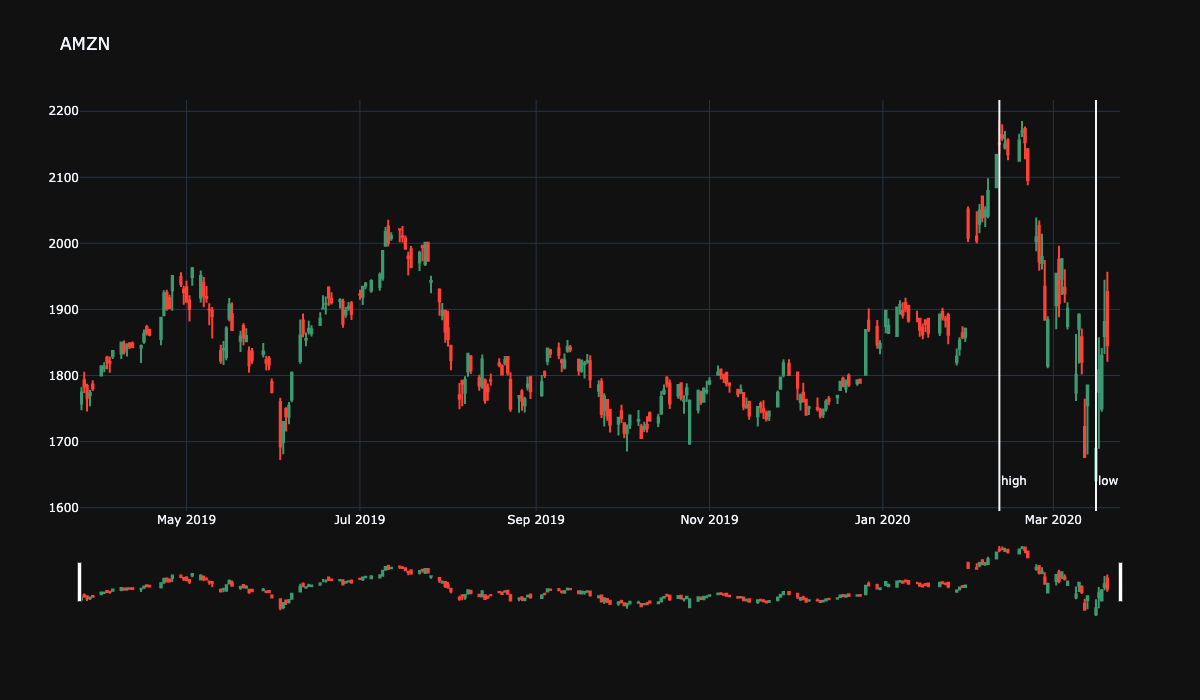

,AMZN
last_close,1846.09
high,2185.95
high_date,2020-02-11 00:00:00
low_after_high,1626.03
low_ah_date,2020-03-16 00:00:00
diff,-559.92
diff_pct,-0.256145
close_std,97.747
close_mean,1851.59
one_sig_below,1753.84


In [8]:
@dataclass
class Marker:
    date: datetime.datetime
    label: str

def make_shape(marker):
    return dict(
        x0=marker.date, 
        x1=marker.date,
        y0=0, y1=1, xref='x', yref='paper',
        line_width=2
    )

def make_annotation(marker):
    return dict(
        x=marker.date,
        y=0.05,
        xref='x',
        yref='paper',
        showarrow=False,
        xanchor='left',
        text=marker.label
    )

def set_markers(fig, markers):
    fig.update_layout(
        shapes = [make_shape(m) for m in markers],
        annotations=[make_annotation(m) for m in markers]
    )
    
def show_fig(fig):
    if os.getenv('IS_CMD'):
        image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
        from IPython.display import Image
        display(Image(image_bytes))
    else:
        fig.show()

def make_graph(symbol):
    df = dfs[symbol]
    fig = go.Figure(data=[go.Candlestick(x=df.index.to_list(),
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'])])
    high_date = analysis.loc[symbol]['high_date']
    low_date = analysis.loc[symbol]['low_ah_date']
    fig.update_layout(title=symbol, height=500)
    set_markers(fig, [
        Marker(date=high_date, label="high"),
        Marker(date=low_date, label="low")
    ])
    show_fig(fig)
    display(pd.DataFrame(analysis.loc[symbol]))
    
for s in symbols:
    make_graph(s)
    

## Ideas

* Add balance sheet graphs overlapped with the stock graphs
* Add linear regression for the whole period and smaller segments